# Project 1
# Volatility Breakout Strategy

#### 2023-1학기
#### Version: 2023-05-16-v2

> 분반: 01
>
> 학번: 
>
> 학과:
>
> 이름: 




In [1]:
# 런타임이 종료되면 이 코드셀은 매번 다시 실행해야 합니다.
# pyupbit 설치
!pip install pyupbit

In [2]:
# Import

import numpy as np
import pandas as pd
import datetime

import pyupbit


In [3]:
# trading_helper 설치 및 버전 확인

!wget https://esohn.be/python/trading_helper.py -O trading_helper.py

import trading_helper
import importlib
importlib.reload(trading_helper)

print( f'Trading Helper Version: {trading_helper.TRADING_HELPER_VERSION}'  )

--2023-06-05 14:06:26--  https://esohn.be/python/trading_helper.py
Resolving esohn.be (esohn.be)... 18.64.8.120, 18.64.8.126, 18.64.8.8, ...
Connecting to esohn.be (esohn.be)|18.64.8.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6252 (6.1K) [text/x-python]
Saving to: ‘trading_helper.py’

trading_helper.py   100%[===================>]   6.11K  --.-KB/s    in 0s      

2023-06-05 14:06:26 (2.91 GB/s) - ‘trading_helper.py’ saved [6252/6252]

Trading Helper Version: 2023.05.15-v1


In [4]:
# ------------------------------------------------------------------------------------------------------
# https://esohn.be/account 의 AUTH CODE 로 실행 로그 기록
# ------------------------------------------------------------------------------------------------------

'''
AUTH_CODE = 'f587ea651febd5446efc61d5e3fef123'  -> 아래에 이렇게 auth code를 붙여넣으세요.
'''
AUTH_CODE = '2b435454dd9860ceba97f35f7aa030f0'

# Do not edit
trading_helper.set_auth_code( AUTH_CODE )


Log updated! (2023-1 YCS1009-01 박희영)


### 가격정보 가져오기

In [5]:
# 가격정보 가져오기

from_date = '20200101'
to_date = '20221231'

df = trading_helper.get_ohlcv2('KRW-BTC', date1=from_date, date2=to_date )

df.head()


,Unnamed: 0,open,high,low,close,volume,value
0,2020-01-01 09:00:00,8308000.0,8387000.0,8287000.0,8300000.0,1030.458147,8.582255e+09
1,2020-01-02 09:00:00,8300000.0,8310000.0,8026000.0,8037000.0,2054.039566,1.679080e+10
2,2020-01-03 09:00:00,8038000.0,8525000.0,7910000.0,8474000.0,5887.008808,4.902161e+10
3,2020-01-04 09:00:00,8476000.0,8520000.0,8382000.0,8482000.0,1987.266881,1.678980e+10
4,2020-01-05 09:00:00,8483000.0,8645000.0,8436000.0,8454000.0,2807.832172,2.403916e+10


### 아래 코드셀을 복사해서 프로젝트 코드로 붙여 넣으세요.

In [6]:
# ------------------------------------------------------------------------------------------------------
# - 코드를 완성했다면 이 코드셀만 복사해서 competition 페이지 Volatility Breakout 탭에 라운드 별 코드 항목으로 붙여넣습니다.
# - 연습할 때는 다음과 같은 이유로 프로젝트 페이지의 에디터에서 직접 연습하지 말고 Colab에서 연습하세요. 
#   + Colab의 연습은 서버에 횟수가 기록되어 평가에 반영됩니다.
#   + Colab 노트북 자체에도 변경 history가 누적 됩니다. (부정행위 방지)
#   + 프로젝트 페이지에서 submit 횟수가 지나치게 빈번한 경우 submit이 일정시간 제한될 수 있습니다.
# ------------------------------------------------------------------------------------------------------

# Given Code Version 2023.05.16-v2


import numpy as np
import pandas as pd
import datetime


# [프로젝트 1]
# volatility_breakout() 변동성 돌파 전략 함수
#
# df - 일별 가격 정보를 가지고 있는 데이터 프레임
# k - k값, 기본값은 0.5
#
# Qualification 라운드 에서는 상승장 구분을 사용하지 않음 (df['cond2'] = True로 남겨둠)
# 그 외의 라운드에서는 원하는 k값과 상승장 구분을 사용하여 경쟁
#
def volatility_breakout( df, k=0.5 ):

    if k < 0:
        return
        
    # 전일 레인지 range_s = (고가 - 저가).shift(1)
    df['range_s'] = (df['high'] - df['low']).shift(1) # EDIT (1)

    # 목표 매수가 = 오늘 시가 + 전일 레인지 * k
    df['target'] = df['open'] + df['range_s'] * k # EDIT (2)

    # 먄약 이동평균을 활용하고 싶으면 다음과 같이 이동평균 열을 추가
    # df['ma5'] = df['close'].rolling(5).mean().shift(1)
    # df['ma20'] = df['close'].rolling(20).mean().shift(1)
    # df['ma50'] = df['close'].rolling(50).mean().shift(1)

    #--------------------------------------------------------------
    # 조건 1 - 변동성 돌파 ( np.where( 고가 >= 목표 매수가, True, False ) )
    '''
    cond1 에는 변동성 돌파 전략을 위한 수식만 사용 가능합니다.
    '''

    df['cond1'] = np.where(df['high'] >= df['target'], True, False) # EDIT (3)
    #--------------------------------------------------------------

    #--------------------------------------------------------------
    # 조건 2 - 상승장 구분 (optional)
    #
    # 추가 조건이 없다면,
    #   df['cond2'] = True 
    # 5일 이동평균보다 시가가 높을 때만 매매한다면, 
    #   df['cond2'] = np.where( (df['open'] >= df['ma5']), True, False )
    # 3일 이동평균 및 5일 이동평균보다 시가가 높을 때만 매매한다면,
    #   df['cond2'] = np.where( (df['open'] >= df['ma3']) & (df['open'] >= df['ma5']), True, False )
    # 
    '''
    cond2 에서 open 이외에 오늘 결정되지 않은 미래의 정보(close, high, low, volume)를 그냥 사용하면 안됩니다.
    .shift(1) 를 붙이면 모두 사용 가능합니다.

    예를 들어, 
    - df['open'] : 사용 가능
    - df['close'].shift(1) : 사용 가능
    - df['high'] : 사용 불가능
    - df['low'].shift(1) : 사용 가능
    - df['close'].shift(2) : 사용 가능
    '''
    
    df['cond2'] = True # EDITABLE
    #--------------------------------------------------------------

    return df

# 이 코드 셀은 함수 정의 이외에는 다른 내용을 아래에 덧붙이지 마세요.
# ------------------------------------------------------------------------------------------------------


### k=0.5, 0.8일 때의 HPR, MDD

In [7]:
# 함수 테스트 (k = 0.5)

volatility_breakout( df, 0.75 )

hpr, mdd = trading_helper.check_performance_vol( df )

print( f'HPR = {hpr * 100:.1f}%, MDD = {mdd * 100:.1f}%' )

HPR = 210.0%, MDD = 26.4%


In [8]:
# 함수 테스트 (k = 0.8)

volatility_breakout( df, 0.8 )

hpr, mdd = trading_helper.check_performance_vol( df )

print( f'HPR = {hpr * 100:.1f}%, MDD = {mdd * 100:.1f}%' )

HPR = 225.7%, MDD = 20.6%


### HPR 그래프

<Axes: >

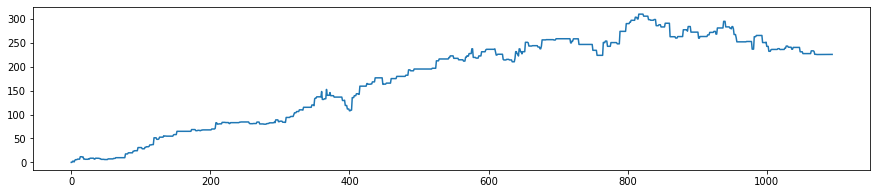

In [9]:
# 기간 수익률(HPR) 변화 추이 그래프

( (df['hpr']-1) * 100).plot( figsize=(15,3) )

### MDD 그래프

<Axes: >

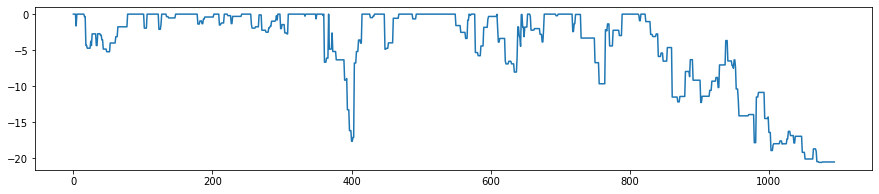

In [10]:
# 낙폭(Drawdown) 변화 추이 그래프

(-df['dd'] * 100).plot( figsize=(15,3) )

### 여러 개의 k값을 시도해보고 싶을 때

In [11]:
# 여러개의 k값을 시도해보고 싶을 때

records = [];

for k in np.arange(0.4, 0.5, 0.02):

    volatility_breakout( df, k )

    hpr, mdd = trading_helper.check_performance_vol( df )

    records.append( ( hpr * 100, mdd * 100, k) )

records.sort(reverse=True)

for record in records:
    print(f'HPR= {record[0]:.1f}% MDD= {record[1]:.1f}% k= {record[2]:.2f}')


HPR= 317.4% MDD= 42.2% k= 0.42
HPR= 273.0% MDD= 46.4% k= 0.46
HPR= 270.0% MDD= 51.2% k= 0.40
HPR= 252.8% MDD= 44.4% k= 0.44
HPR= 203.3% MDD= 46.9% k= 0.48


# 코드 보관 장소 
### 아래에 보관하고 싶은 코드를 자유롭게 수정/추가할 수 있습니다.
---

### Qual. Round 1, 2 Code

In [12]:
# ------------------------------------------------------------------------------------------------------
# - 코드를 완성했다면 이 코드셀만 복사해서 competition 페이지 Volatility Breakout 탭에 라운드 별 코드 항목으로 붙여넣습니다.
# - 연습할 때는 다음과 같은 이유로 프로젝트 페이지의 에디터에서 직접 연습하지 말고 Colab에서 연습하세요. 
#   + Colab의 연습은 서버에 횟수가 기록되어 평가에 반영됩니다.
#   + Colab 노트북 자체에도 변경 history가 누적 됩니다. (부정행위 방지)
#   + 프로젝트 페이지에서 submit 횟수가 지나치게 빈번한 경우 submit이 일정시간 제한될 수 있습니다.
# ------------------------------------------------------------------------------------------------------

# Given Code Version 2023.05.11-v1


import numpy as np
import pandas as pd
import datetime


# [프로젝트 1]
# volatility_breakout() 변동성 돌파 전략 함수
#
# df - 일별 가격 정보를 가지고 있는 데이터 프레임
# k - k값, 기본값은 0.5
#
# Qualification 라운드 에서는 상승장 구분을 사용하지 않음 (df['cond2'] = True로 남겨둠)
# 그 외의 라운드에서는 원하는 k값과 상승장 구분을 사용하여 경쟁
#
def volatility_breakout( df, k=0.5 ):

    if k < 0:
        return
        
    # 전일 레인지 range_s = (고가 - 저가).shift(1)
    df['range_s'] = 0 # EDIT (1)

    # 목표 매수가 = 오늘 시가 + 전일 레인지 * k
    df['target'] = 0 # EDIT (2)

    # 먄약 이동평균을 활용하고 싶으면 다음과 같이 이동평균 열을 추가
    # df['ma5'] = df['close'].rolling(5).mean().shift(1)
    # df['ma20'] = df['close'].rolling(20).mean().shift(1)
    # df['ma50'] = df['close'].rolling(50).mean().shift(1)

    #--------------------------------------------------------------
    # 조건 1 - 변동성 돌파 ( np.where( 고가 >= 목표 매수가, True, False ) )
    '''
    cond1 에는 변동성 돌파 전략을 위한 수식만 사용 가능합니다.
    '''

    df['cond1'] = False # EDIT (3)
    #--------------------------------------------------------------

    #--------------------------------------------------------------
    # 조건 2 - 상승장 구분 (optional)
    #
    # 추가 조건이 없다면,
    #   df['cond2'] = True 
    # 5일 이동평균보다 시가가 높을 때만 매매한다면, 
    #   df['cond2'] = np.where( (df['open'] >= df['ma5']), True, False )
    # 3일 이동평균 및 5일 이동평균보다 시가가 높을 때만 매매한다면,
    #   df['cond2'] = np.where( (df['open'] >= df['ma3']) & (df['open'] >= df['ma5']), True, False )
    # 
    '''
    cond2 에서 open 이외에 오늘 결정되지 않은 미래의 정보(close, high, low, volume)를 그냥 사용하면 안됩니다.
    .shift(1) 를 붙이면 모두 사용 가능합니다.

    예를 들어, 
    - df['open'] : 사용 가능
    - df['close'].shift(1) : 사용 가능
    - df['high'] : 사용 불가능
    - df['low'].shift(1) : 사용 가능
    - df['close'].shift(2) : 사용 가능
    '''
    
    df['cond2'] = True # EDITABLE
    #--------------------------------------------------------------

    return df

# 이 코드 셀은 함수 정의 이외에는 다른 내용을 아래에 덧붙이지 마세요.
# ------------------------------------------------------------------------------------------------------


### Comp. Round 1 (MDD 20) Code

> Indented block



### Comp. Round 2 (MDD 10) Code

### Bonus Round Code